In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7zKLQAU4XWEYcuzpa0wyoE2G8A7Pi6pZ3ok_StGYfsJZbDuX7u7Kw
Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/data_raw_rose.zip' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/client_rose_raw.txt' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/imposter_rose_raw.txt' './'

In [ ]:
!wget "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"

--2021-04-08 10:02:30--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  14.7MB/s    in 6.2s    

2021-04-08 10:02:37 (9.77 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bzip2 -d "shape_predictor_68_face_landmarks.dat.bz2"

In [ ]:
!unzip data_raw_rose.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/imposter/Vm_NT_5s_wg_E_23_139/test71.jpg  
  inflating: data/imposter/Vm_NT_5s_wg_E_23_139/test27.jpg  
  inflating: data/imposter/Vm_NT_5s_wg_E_23_139/test4.jpg  
  inflating: data/imposter/Vm_NT_5s_wg_E_23_139/test81.jpg  
  inflating: data/imposter/Vm_NT_5s_wg_E_23_139/test43.jpg  
   creating: data/imposter/Mf_NT_5s_wg_E_10_45/
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test9.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test26.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test24.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test37.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test12.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test36.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test16.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test76.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test62.jpg  
  inflating: data/imposter/Mf_NT_5s_wg_E_10_45/test55.jpg 

In [ ]:
import cv2
import dlib
import numpy as np
import os
from imutils import paths
import pickle
import random
from scipy.stats import norm
import tqdm
INPUT_SIZE = 112


# TEst

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [ ]:
img = cv2.imread('/content/data/client/G_NT_5s_g_E_11_1/test0.jpg')

In [ ]:
Y, X, C = img.shape
X, Y, C

(720, 1280, 3)

In [ ]:
dets = detector(img[...,::-1])
if dets:
  max_a = (dets[0].bottom() - dets[0].top()) * (dets[0].right() - dets[0].left())
  d = dets[0]
  if len(dets) > 1:
    for dz in dets[1:]:
      h = (dz.bottom() - dz.top()) * (dz.right() - dz.left())
      if h > max_a:
        d = dz

In [ ]:
size = [Y-d.bottom(), d.left(), d.top(), X-d.right()]
min_ = min(size)
min_

156

In [ ]:
img = cv2.rectangle(img, (d.left()-min_,d.top()-min_), (d.right()+min_,d.bottom()+min_),(255,0,0),5)

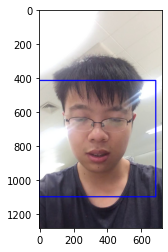

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[...,::-1])

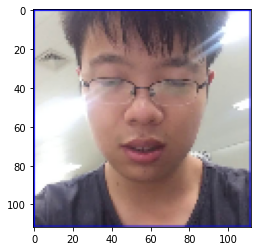

In [ ]:
test = cv2.resize(img[d.top()-min_:d.bottom()+min_,d.left()-min_:d.right()+min_,::-1], (112,112))
import matplotlib.pyplot as plt
plt.imshow(test)

In [ ]:
import matplotlib.pyplot as plt

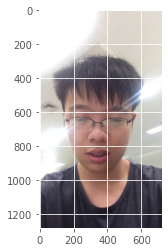

In [ ]:
img = dlib.load_rgb_image('/content/data/client/G_NT_5s_g_E_11_1/test0.jpg')
plt.imshow(img)

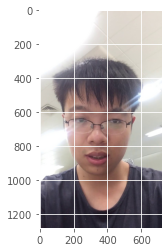

In [ ]:
box, e = create_box_rgb(img)
img2  = dlib.load_rgb_image('/content/data/client/G_NT_5s_g_E_11_1/test1.jpg')
plt.imshow(img2)

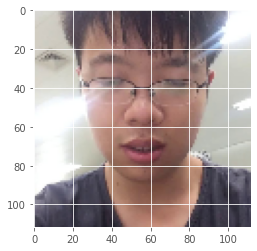

In [ ]:
crop_img, e = crop_rgb(img, box)
plt.imshow(crop_img)

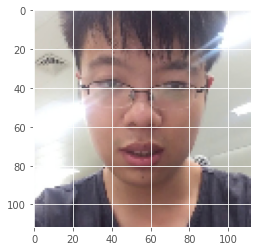

In [ ]:
crop_img2, e = crop_rgb(img2, box)
plt.imshow(crop_img2)

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
client_dataset = []
for name in os.listdir('/content/data/client'):
    client_dataset.append(name)

In [ ]:
def create_box_rgb(img):
  Y, X, C = img.shape
  dets = detector(img)
  flag = False
  if dets:
    max_a = (dets[0].bottom() - dets[0].top()) * (dets[0].right() - dets[0].left())
    d = dets[0]
    if len(dets) > 1:
      for dz in dets[1:]:
        h = (dz.bottom() - dz.top()) * (dz.right() - dz.left())
        if h > max_a:
          d = dz
    size = [Y-d.bottom(), d.left(), d.top(), X-d.right()]
    min_ = min(size)
    return (d.top()-min_,d.bottom()+min_,d.left()-min_,d.right()+min_), flag
  else:
    flag = True
    return None, flag

In [ ]:
def crop_rgb(img, box):
  top, bottom, left, right = box
  img = img[top:bottom, left:right]
  dets = detector(img)
  flag = False
  if dets:
    try:
      temp = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    except Exception as e:
      flag = True
    if flag:
      return None, flag
    else:
      return temp, flag
  else:
    return None, True


In [ ]:
def calculate_optical_flow(old, new):
  old = old[...,::-1]
  new = new[...,::-1]
  old_gray = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
  new_gray = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
  flow = cv2.calcOpticalFlowFarneback(old_gray, new_gray, None, 0.5, 3, 29, 3, 5, 1.2, 0)
  return flow

In [ ]:
X_5 = []
X_10 = []
X_15 = []
X_20 = []
imagePaths = list(map(lambda x: x.rstrip(),open('client_rose_raw.txt').readlines()))
for key in tqdm.tqdm(client_dataset):
    imgs = list(filter(lambda x: key in x, imagePaths))
    if len(imgs) < 20:
      print('Not valid')
    else:
      for i in range(len(imgs)):
        if i + 19 > len(imgs) - 1 :
          break
        else:
          flags = []
          old = dlib.load_rgb_image(imgs[i])
          new_5 = dlib.load_rgb_image(imgs[i+4])
          new_10 = dlib.load_rgb_image(imgs[i+9])
          new_15 = dlib.load_rgb_image(imgs[i+14])
          new_20 = dlib.load_rgb_image(imgs[i+19])
          box, e = create_box_rgb(old)
          if box is None:
            continue
          else:
            old, e = crop_rgb(old, box)
            flags.append(e)
            new_5, e = crop_rgb(new_5, box)
            flags.append(e)
            new_10, e = crop_rgb(new_10, box)
            flags.append(e)
            new_15, e = crop_rgb(new_15, box)
            flags.append(e)
            new_20, e = crop_rgb(new_20, box)
            flags.append(e)
          if True in flags:
            continue
          else:
            flow_5 = calculate_optical_flow(old, new_5)
            flow_10 = calculate_optical_flow(old, new_10)
            flow_15 = calculate_optical_flow(old, new_15)
            flow_20 = calculate_optical_flow(old, new_20)
            X_5.append(flow_5)
            X_10.append(flow_10)
            X_15.append(flow_15)
            X_20.append(flow_20)
      





  0%|          | 0/180 [00:00<?, ?it/s]


  1%|          | 1/180 [00:41<2:03:59, 41.56s/it]


  1%|          | 2/180 [01:22<2:03:00, 41.46s/it]


  2%|▏         | 3/180 [02:17<2:14:06, 45.46s/it]


  2%|▏         | 4/180 [03:25<2:32:47, 52.09s/it]


  3%|▎         | 5/180 [04:14<2:29:32, 51.27s/it]


  3%|▎         | 6/180 [05:09<2:31:50, 52.36s/it]


  4%|▍         | 7/180 [05:44<2:16:07, 47.21s/it]


  4%|▍         | 8/180 [06:21<2:06:36, 44.17s/it]


  5%|▌         | 9/180 [07:24<2:22:07, 49.87s/it]


  6%|▌         | 10/180 [08:10<2:17:47, 48.63s/it]


  6%|▌         | 11/180 [08:57<2:15:33, 48.13s/it]


  7%|▋         | 12/180 [10:09<2:35:07, 55.40s/it]


  7%|▋         | 13/180 [10:59<2:29:20, 53.66s/it]


  8%|▊         | 14/180 [11:39<2:17:06, 49.56s/it]


  8%|▊         | 15/180 [12:18<2:07:33, 46.38s/it]


  9%|▉         | 16/180 [12:56<2:00:09, 43.96s/it]


  9%|▉         | 17/180 [13:46<2:03:47, 45.57s/it]


 10%|█         | 18/180 [14:26<1:58:52, 44.03s/it]


 11%|█    

In [ ]:
X_5 = np.array(X_5)
X_10 = np.array(X_10)
X_15 = np.array(X_15)
X_20 = np.array(X_20)
X_5.shape, X_10.shape, X_15.shape, X_20.shape

((13416, 112, 112, 2),
 (13416, 112, 112, 2),
 (13416, 112, 112, 2),
 (13416, 112, 112, 2))

In [ ]:
with open('X_5_rose_raw_true_2.pickle', 'wb') as handle:
  pickle.dump(X_5, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_10_rose_raw_true_2.pickle', 'wb') as handle:
  pickle.dump(X_10, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_15_rose_raw_true_2.pickle', 'wb') as handle:
  pickle.dump(X_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_20_rose_raw_true_2.pickle', 'wb') as handle:
  pickle.dump(X_20, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!cp 'X_5_rose_raw_true_2.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp 'X_10_rose_raw_true_2.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp 'X_15_rose_raw_true_2.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp 'X_20_rose_raw_true_2.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
imposter_dataset = []
for name in os.listdir('/content/data/imposter'):
    imposter_dataset.append(name)

In [ ]:
X_5_imposter = []
X_10_imposter = []
X_15_imposter = []
X_20_imposter = []
imagePaths = list(map(lambda x: x.rstrip(),open('imposter_rose_raw.txt').readlines()))
for key in tqdm.tqdm(imposter_dataset):
    print(key)
    imgs = list(filter(lambda x: key in x, imagePaths))
    if len(imgs) < 20:
      print('Not valid')
    else:
      for i in range(len(imgs)):
        if i + 19 > len(imgs) - 1 :
          break
        else:
          flags = []
          old = dlib.load_rgb_image(imgs[i])
          new_5 = dlib.load_rgb_image(imgs[i+4])
          new_10 = dlib.load_rgb_image(imgs[i+9])
          new_15 = dlib.load_rgb_image(imgs[i+14])
          new_20 = dlib.load_rgb_image(imgs[i+19])
          box, e = create_box_rgb(old)
          if box is None:
            continue
          else:
            old, e = crop_rgb(old, box)
            flags.append(e)
            new_5, e = crop_rgb(new_5, box)
            flags.append(e)
            new_10, e = crop_rgb(new_10, box)
            flags.append(e)
            new_15, e = crop_rgb(new_15, box)
            flags.append(e)
            new_20, e = crop_rgb(new_20, box)
            flags.append(e)
          if True in flags:
            continue
          else:
            flow_5 = calculate_optical_flow(old, new_5)
            flow_10 = calculate_optical_flow(old, new_10)
            flow_15 = calculate_optical_flow(old, new_15)
            flow_20 = calculate_optical_flow(old, new_20)
            X_5_imposter.append(flow_5)
            X_10_imposter.append(flow_10)
            X_15_imposter.append(flow_15)
            X_20_imposter.append(flow_20)

  0%|          | 0/360 [00:00<?, ?it/s]

Vl_NT_5s_wg_E_22_143
Not valid
Vm_NT_5s_g_E_5_162
Not valid
Vl_NT_5s_wg_E_13_145
Not valid
Vm_NT_5s_g_E_14_162
Not valid
Vm_NT_5s_wg_E_14_164
Not valid
Mf_NT_5s_g_E_11_71


  2%|▏         | 6/360 [00:35<35:09,  5.96s/it]

Mf_NT_5s_wg_E_12_71


  2%|▏         | 7/360 [01:05<1:17:08, 13.11s/it]

Vl_NT_5s_g_E_16_142
Not valid
Pq_NT_5s_wg_E_7_77


  2%|▎         | 9/360 [01:42<1:25:56, 14.69s/it]

Vl_NT_5s_wg_E_5_143
Not valid
Vm_NT_5s_wg_E_18_164
Not valid
Pq_NT_5s_wg_E_11_102


  3%|▎         | 12/360 [02:17<1:20:15, 13.84s/it]

Pq_NT_5s_wg_E_23_78


  4%|▎         | 13/360 [02:46<1:45:07, 18.18s/it]

Ps_NT_5s_wg_E_18_123


  4%|▍         | 14/360 [03:18<2:09:36, 22.47s/it]

Pq_NT_5s_wg_E_13_106


  4%|▍         | 15/360 [03:47<2:20:42, 24.47s/it]

Vm_NT_5s_wg_E_7_139
Not valid
Vm_NT_5s_wg_E_23_139
Not valid
Pq_NT_5s_g_E_9_101


  5%|▌         | 18/360 [04:29<2:01:15, 21.27s/it]

Vl_NT_5s_wg_E_2_143
Not valid
Vl_NT_5s_wg_E_6_143
Not valid
Pq_NT_5s_g_E_5_101


  6%|▌         | 21/360 [05:17<1:51:35, 19.75s/it]

Vm_NT_5s_g_E_20_161
Not valid
Vm_NT_5s_g_E_2_161
Not valid
Vl_NT_5s_g_E_11_141
Not valid
Vm_NT_5s_wg_E_2_164
Not valid
Vl_NT_5s_wg_E_3_143
Not valid
Pq_NT_5s_g_E_5_102


  8%|▊         | 27/360 [05:58<1:28:06, 15.87s/it]

Ps_NT_5s_g_E_12_122


  8%|▊         | 28/360 [06:37<2:06:16, 22.82s/it]

Pq_NT_5s_wg_E_12_104


  8%|▊         | 29/360 [07:18<2:36:14, 28.32s/it]

Vl_NT_5s_g_E_6_142
Not valid
Vm_NT_5s_g_E_20_162
Not valid
Vl_NT_5s_wg_E_9_143
Not valid
Vl_NT_5s_wg_E_16_143
Not valid
Mf_NT_5s_g_E_6_70


KeyboardInterrupt: ignored

In [ ]:
X_5_imposter = np.array(X_5_imposter)
X_10_imposter = np.array(X_10_imposter)
X_15_imposter = np.array(X_15_imposter)
X_20_imposter = np.array(X_20_imposter)
X_5_imposter.shape, X_10_imposter.shape, X_15_imposter.shape, X_20_imposter.shape

((10938, 112, 112, 2),
 (10938, 112, 112, 2),
 (10938, 112, 112, 2),
 (10938, 112, 112, 2))

In [ ]:
with open('X_5_imposter_rose_raw_true_3.pickle', 'wb') as handle:
  pickle.dump(X_5_imposter, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_10_imposter_rose_raw_true_3.pickle', 'wb') as handle:
  pickle.dump(X_10_imposter, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_15_imposter_rose_raw_true_3.pickle', 'wb') as handle:
  pickle.dump(X_15_imposter, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_20_imposter_rose_raw_true_3.pickle', 'wb') as handle:
  pickle.dump(X_20_imposter, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!cp 'X_5_imposter_rose_raw_true_3.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp 'X_10_imposter_rose_raw_true_3.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp 'X_15_imposter_rose_raw_true_3.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp 'X_20_imposter_rose_raw_true_3.pickle' '/content/drive/MyDrive/RoseYoutu/'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_rose_raw_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_rose_raw_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_rose_raw_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_rose_raw_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_imposter_rose_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_imposter_rose_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_imposter_rose_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_imposter_rose_raw_true_3.pickle' './'

In [ ]:
with open('X_5_imposter_rose_raw_true_3.pickle', 'rb') as handle:
  X_5_imposter = pickle.load(handle)

In [ ]:
with open('X_10_imposter_rose_raw_true_3.pickle', 'rb') as handle:
  X_10_imposter = pickle.load(handle)

In [ ]:
with open('X_15_imposter_rose_raw_true_3.pickle', 'rb') as handle:
  X_15_imposter = pickle.load(handle)

In [ ]:
with open('X_20_imposter_rose_raw_true_3.pickle', 'rb') as handle:
  X_20_imposter = pickle.load(handle)

In [ ]:
with open('X_5_rose_raw_true_2.pickle', 'rb') as handle:
  X_5 = pickle.load(handle)

In [ ]:
with open('X_10_rose_raw_true_2.pickle', 'rb') as handle:
  X_10 = pickle.load(handle)

In [ ]:
with open('X_15_rose_raw_true_2.pickle', 'rb') as handle:
  X_15 = pickle.load(handle)

In [ ]:
with open('X_20_rose_raw_true_2.pickle', 'rb') as handle:
  X_20 = pickle.load(handle)

In [ ]:
y = np.array([0]*X_5.shape[0] + [1]*X_5_imposter.shape[0])

In [ ]:
X_5_total = np.vstack((X_5, X_5_imposter))
del X_5
del X_5_imposter

In [ ]:
X_10_total = np.vstack((X_10, X_10_imposter))
del X_10
del X_10_imposter

In [ ]:
X_15_total = np.vstack((X_15, X_15_imposter))
del X_15
del X_15_imposter

In [ ]:
X_20_total = np.vstack((X_20, X_20_imposter))
del X_20
del X_20_imposter

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train_5,  X_test_5, y_train_5, y_test_5 = train_test_split(X_5_total, y, test_size = 0.2, random_state=42)
del X_5_total
X_train_10,  X_test_10, y_train_10, y_test_10 = train_test_split(X_10_total, y, test_size = 0.2, random_state=42)
del X_10_total
X_train_15,  X_test_15, y_train_15, y_test_15 = train_test_split(X_15_total, y, test_size = 0.2, random_state=42)
del X_15_total
X_train_20,  X_test_20, y_train_20, y_test_20 = train_test_split(X_20_total, y, test_size = 0.2, random_state=42)
del X_20_total

In [ ]:
False in (y_train_10 == y_train_15)

False

In [ ]:
import tensorflow as tf
# import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# SIMPLE NET

In [ ]:
def simple_net(n_channels = 2):
  simple_net = tf.keras.Sequential()
  simple_net.add(tf.keras.layers.Input((112, 112, n_channels)))
  simple_net.add(tf.keras.layers.Conv2D(16, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(32, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(64, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(128, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(256, (5, 5)))
  simple_net.add(tf.keras.layers.Flatten())
  simple_net.add(tf.keras.layers.Reshape((-1,1)))
  return simple_net

In [ ]:
simple_net_5 = simple_net()
simple_net_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0

In [ ]:
simple_net_10 = simple_net()
simple_net_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
activation_4 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 53, 53, 32)       

In [ ]:
simple_net_15 = simple_net()
simple_net_15.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_8 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
activation_8 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 53, 53, 32)       

In [ ]:
simple_net_20 = simple_net()
simple_net_20.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_12 (Batc (None, 110, 110, 16)      64        
_________________________________________________________________
activation_12 (Activation)   (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 53, 53, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 53, 53, 32)       

In [ ]:
def min_pool2d(x):
    min_x = -K.pool2d(-x, pool_size=(2, 2), strides=(2, 2))
    return min_x
def min_pool2d_output_shape(input_shape):
    shape = list(input_shape)
    shape[1] /= 2
    shape[2] /= 2
    return tuple(shape)

In [ ]:
concat = tf.keras.layers.Concatenate(axis=-1)([simple_net_5.output, simple_net_10.output, simple_net_15.output, simple_net_20.output])
# concat.shape
reshap = tf.keras.layers.Reshape((256, 4, 1))(concat)
reshap.shape
max = tf.keras.layers.MaxPooling2D()(reshap)
ave = tf.keras.layers.AveragePooling2D()(reshap)
min = tf.keras.layers.Lambda(min_pool2d, output_shape=min_pool2d_output_shape)(reshap)

In [ ]:
max_flatten = tf.keras.layers.Flatten()(max)
ave_flatten = tf.keras.layers.Flatten()(ave)
min_flatten = tf.keras.layers.Flatten()(min)

In [ ]:
concat2 = tf.keras.layers.Concatenate(axis=1)([max_flatten, ave_flatten, min_flatten])
concat2.shape

TensorShape([None, 768])

In [ ]:
sig = tf.keras.layers.Dense(1, activation='sigmoid')(concat2)

In [ ]:
model = tf.keras.Model([simple_net_5.input, simple_net_10.input, simple_net_15.input, simple_net_20.input], sig)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 112, 112, 2) 0                                            
______________________________________________________________________________________________

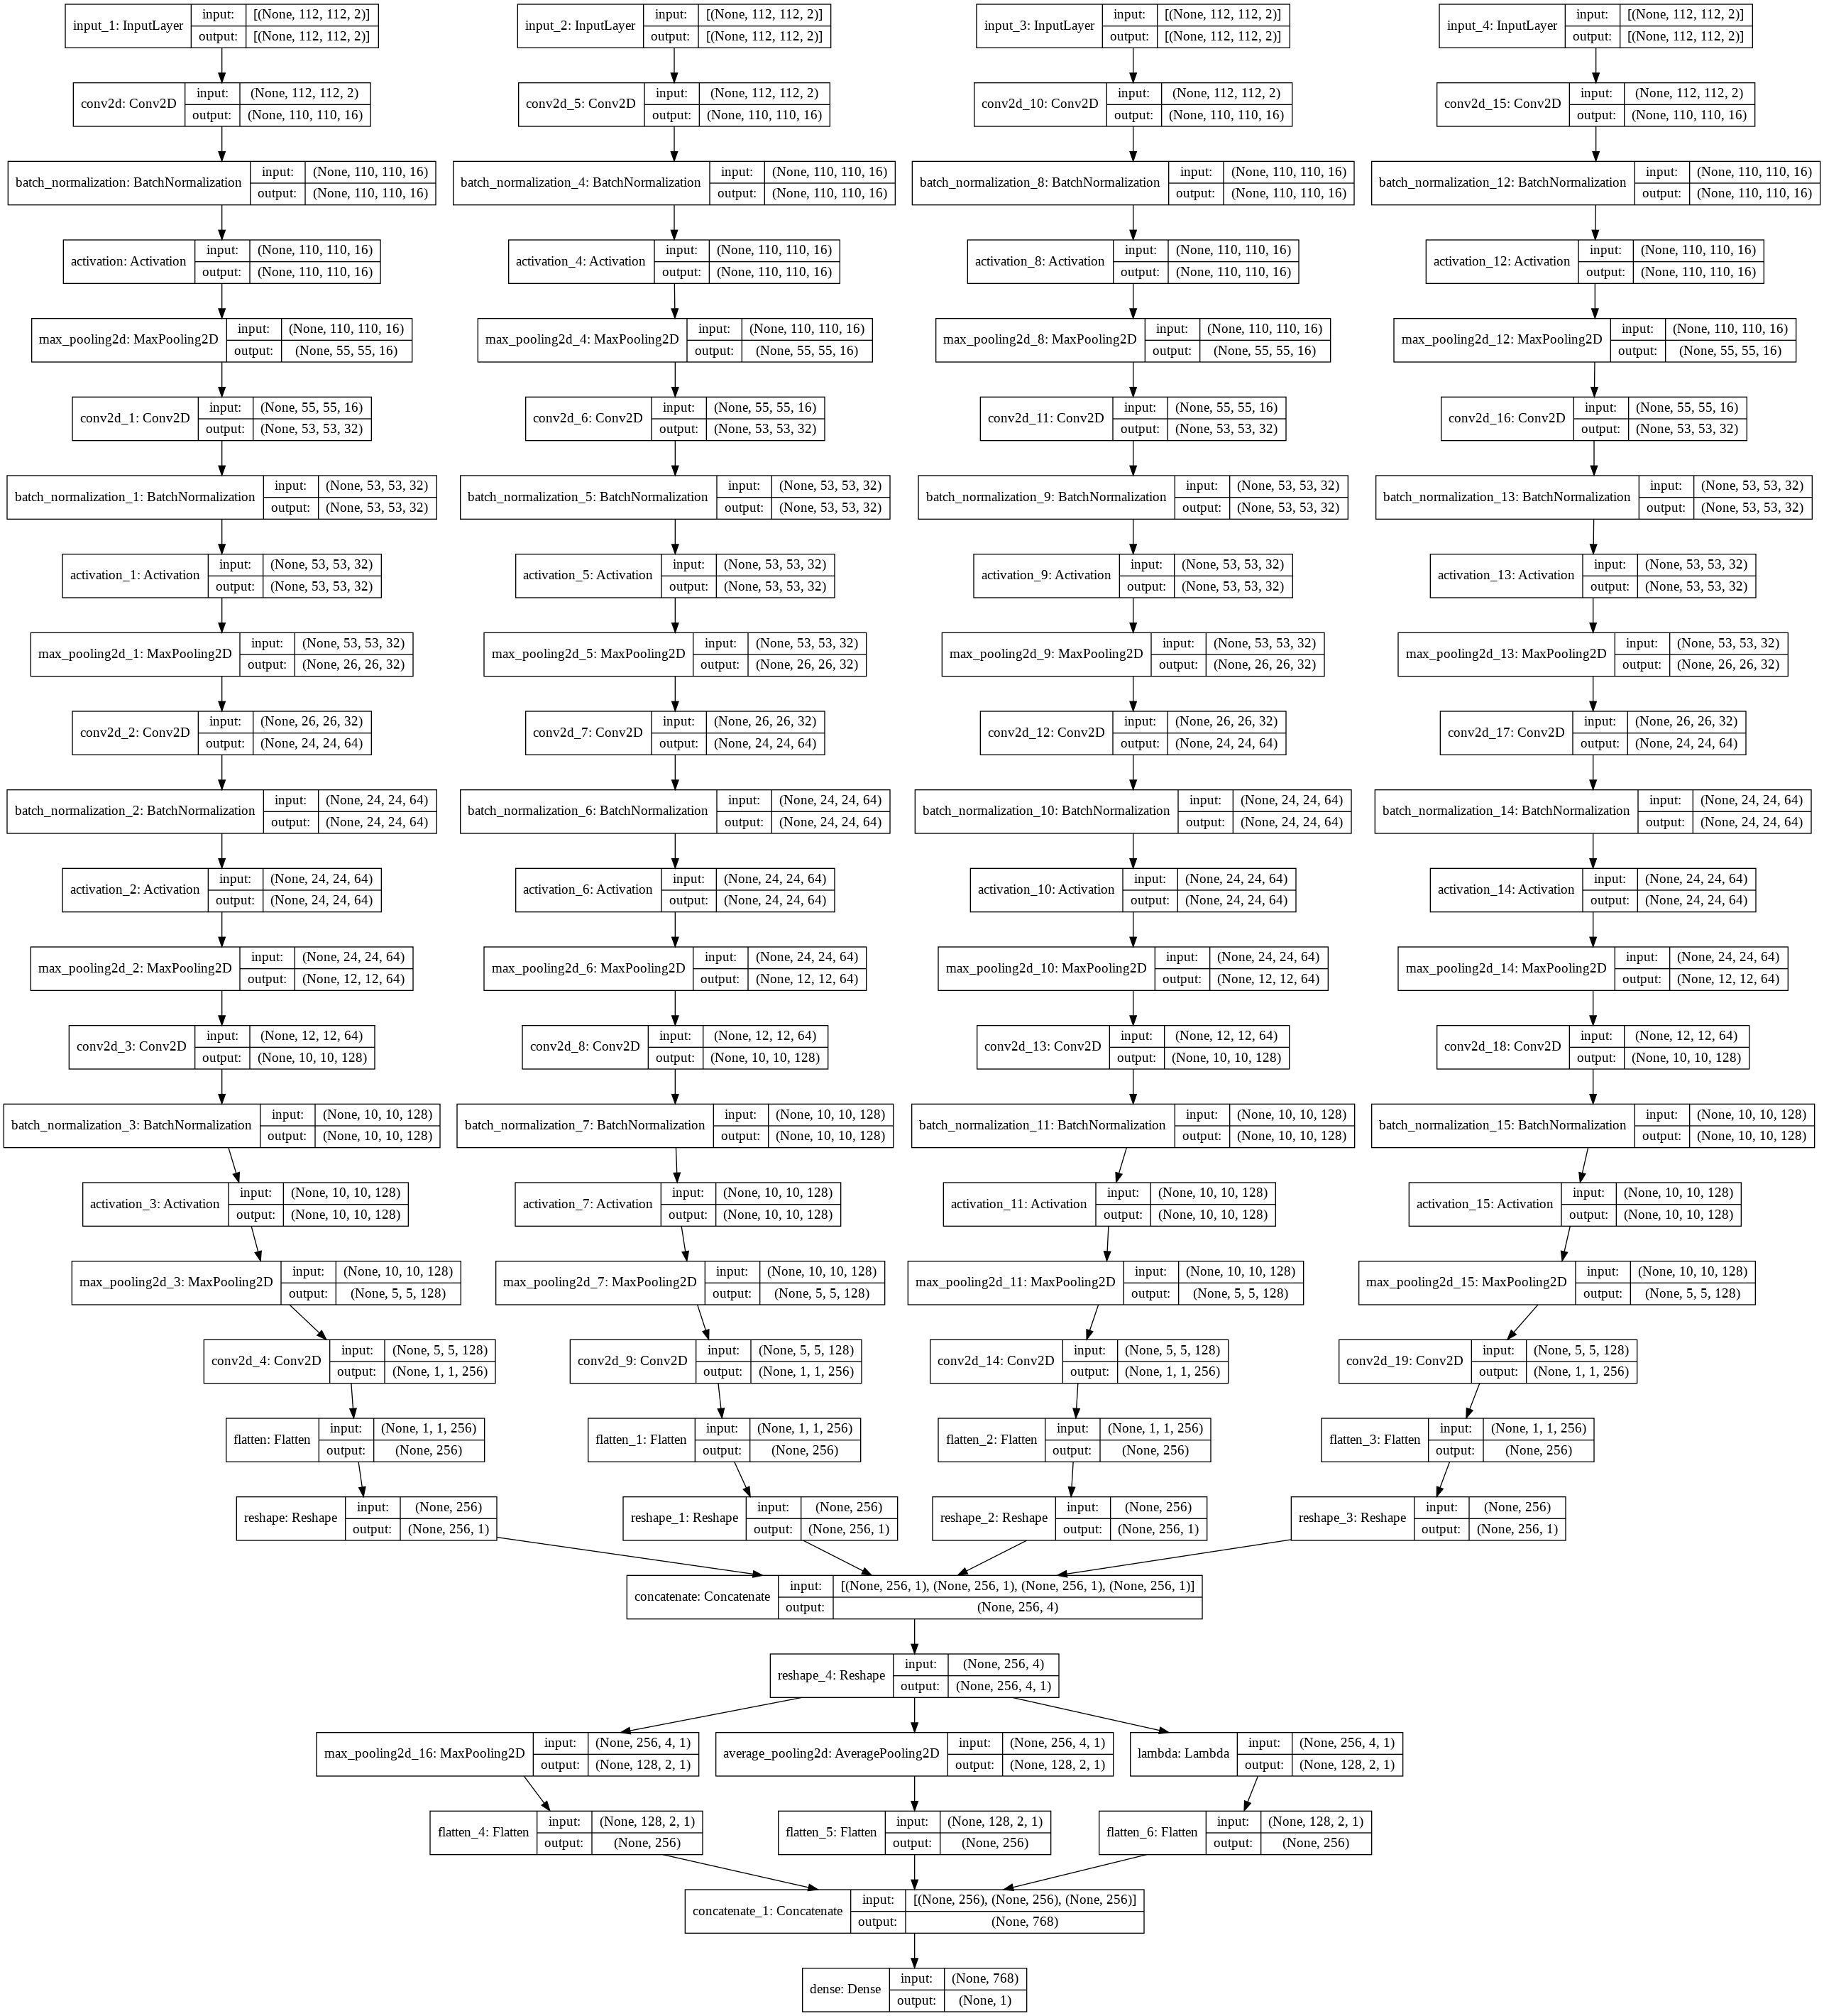

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
INIT_LR = 1e-3
BS = 8
EPOCHS = 15

In [ ]:
# opt = Adam(lr=INIT_LR)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
H = model.fit([X_train_5, X_train_10, X_train_15, X_train_20], y_train_5, batch_size=BS,
	validation_split=0.2,
	epochs=EPOCHS)

Epoch 1/15
1949/1949 [==============================] - 88s 33ms/step - loss: 1.4435 - accuracy: 0.6154 - val_loss: 0.5824 - val_accuracy: 0.6916
Epoch 2/15
1949/1949 [==============================] - 40s 21ms/step - loss: 0.5485 - accuracy: 0.7178 - val_loss: 0.4685 - val_accuracy: 0.7811
Epoch 3/15
1949/1949 [==============================] - 41s 21ms/step - loss: 0.4063 - accuracy: 0.8264 - val_loss: 0.3459 - val_accuracy: 0.8630
Epoch 4/15
1949/1949 [==============================] - 41s 21ms/step - loss: 0.3169 - accuracy: 0.8734 - val_loss: 0.5196 - val_accuracy: 0.7993
Epoch 5/15
1949/1949 [==============================] - 41s 21ms/step - loss: 0.2606 - accuracy: 0.8953 - val_loss: 0.2895 - val_accuracy: 0.8925
Epoch 6/15
1949/1949 [==============================] - 41s 21ms/step - loss: 0.2043 - accuracy: 0.9250 - val_loss: 0.2146 - val_accuracy: 0.9233
Epoch 7/15
1949/1949 [==============================] - 41s 21ms/step - loss: 0.1747 - accuracy: 0.9330 - val_loss: 0.2336 -

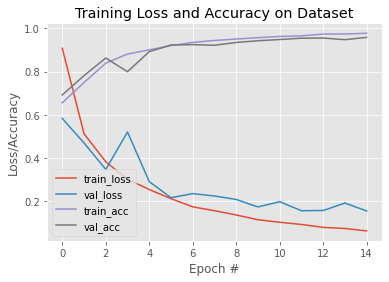

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
model.evaluate([X_test_5, X_test_10, X_test_15, X_test_20], y_test_5, batch_size=BS)

609/609 [==============================] - 12s 19ms/step - loss: 0.1404 - accuracy: 0.9651


[0.1404396891593933, 0.965099573135376]

In [ ]:
model.save('big_model_08_04.h5')

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/big_model_08_04.h5' './'

In [ ]:
del X_test
del y_test

# Testing

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_imposter_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_imposter_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_imposter_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_imposter_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_nuaa_raw_true_3.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_nuaa_raw_true_3.pickle' './'

In [ ]:
with open('X_5_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_5 = pickle.load(handle)

In [ ]:
with open('X_10_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_10 = pickle.load(handle)

In [ ]:
with open('X_15_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_15 = pickle.load(handle)

In [ ]:
with open('X_20_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_20 = pickle.load(handle)

In [ ]:
with open('X_5_imposter_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_5_imposter = pickle.load(handle)

In [ ]:
with open('X_10_imposter_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_10_imposter = pickle.load(handle)

In [ ]:
with open('X_15_imposter_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_15_imposter = pickle.load(handle)

In [ ]:
with open('X_20_imposter_nuaa_raw_true_3.pickle', 'rb') as handle:
  X_20_imposter = pickle.load(handle)

In [ ]:
y = np.array([0]*X_5.shape[0] + [1]*X_5_imposter.shape[0])

In [ ]:
X_5_total = np.vstack((X_5, X_5_imposter))
del X_5
del X_5_imposter
X_10_total = np.vstack((X_10, X_10_imposter))
del X_10
del X_10_imposter
X_15_total = np.vstack((X_15, X_15_imposter))
del X_15
del X_15_imposter
X_20_total = np.vstack((X_20, X_20_imposter))
del X_20
del X_20_imposter

In [ ]:
model = tf.keras.models.load_model('big_model_08_04.h5')

In [ ]:
model.evaluate([X_5_total, X_10_total, X_15_total, X_20_total], y)

467/467 [==============================] - 7s 15ms/step - loss: 1.9313 - accuracy: 0.7156


[1.9312695264816284, 0.7155576348304749]

In [ ]:
X_5_total[0].shape

(112, 112, 2)

In [ ]:
y[0]

0

In [ ]:
y_pred = []
for _ in range(X_5_total.shape[0]):
  pred = model.predict([X_5_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X_10_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X_15_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X_20_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2)]).flatten()[0]
  if pred > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7135    0.9011    0.7964      9222
           1     0.7229    0.4162    0.5283      5716

    accuracy                         0.7156     14938
   macro avg     0.7182    0.6587    0.6623     14938
weighted avg     0.7171    0.7156    0.6938     14938



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
CM = confusion_matrix(y, y_pred)

In [ ]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [ ]:
APCER = FP / (TN + FP)
BPCER = FN / (TP + FN)

In [ ]:
APCER, BPCER

(0.0988939492517892, 0.5837998600419874)

In [ ]:
(APCER + BPCER) / 2

0.34134690464688827